### MVP Questions

- What stations have the most traffic during the analysis timeframe? 
- On what days are the most people using MTA, what day are they least using?
- During what time of day do most people use MTA, least use MTA?
- What stations have the most traffic, at what time of day?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
turnstiles_df = pd.read_csv('/Users/jennihawk/Desktop/Cliffbar/1_Clean_Data/turnstiles_cleaned2.csv',parse_dates=['DATE', 'DATE_TIME'])
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,03:00:00,REGULAR,7693605,2677444,2022-03-12 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,07:00:00,REGULAR,7693608,2677454,2022-03-12 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,11:00:00,REGULAR,7693627,2677547,2022-03-12 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,15:00:00,REGULAR,7693672,2677621,2022-03-12 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,19:00:00,REGULAR,7693730,2677683,2022-03-12 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1468120,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-02-04,04:00:00,REGULAR,0,23,2022-02-04 04:00:00
1468121,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-02-04,08:00:00,REGULAR,0,23,2022-02-04 08:00:00
1468122,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-02-04,12:00:00,RECOVR AUD,0,23,2022-02-04 12:00:00
1468123,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-02-04,16:00:00,RECOVR AUD,0,23,2022-02-04 16:00:00


In [3]:
#runs code not in memory. =, inplace puts it in memory
turnstiles_df['DATE_TIME'].dt.hour

0           3
1           7
2          11
3          15
4          19
           ..
1468120     4
1468121     8
1468122    12
1468123    16
1468124    20
Name: DATE_TIME, Length: 1468125, dtype: int64

In [4]:
turnstiles_df['HOUR'] = turnstiles_df['DATE_TIME'].dt.hour
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,03:00:00,REGULAR,7693605,2677444,2022-03-12 03:00:00,3
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,07:00:00,REGULAR,7693608,2677454,2022-03-12 07:00:00,7
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,11:00:00,REGULAR,7693627,2677547,2022-03-12 11:00:00,11
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,15:00:00,REGULAR,7693672,2677621,2022-03-12 15:00:00,15
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,19:00:00,REGULAR,7693730,2677683,2022-03-12 19:00:00,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468120,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-02-04,04:00:00,REGULAR,0,23,2022-02-04 04:00:00,4
1468121,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-02-04,08:00:00,REGULAR,0,23,2022-02-04 08:00:00,8
1468122,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-02-04,12:00:00,RECOVR AUD,0,23,2022-02-04 12:00:00,12
1468123,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-02-04,16:00:00,RECOVR AUD,0,23,2022-02-04 16:00:00,16


In [5]:
#turnstiles_df.info()

### Look at a specific turnstile on a specific date

Looks like each row represents a turnstile (identified by a combination of the C/A, UNIT, SCP, and STATION columns) at a specific time -- approximately four hours apart. The ENTRIES column represents cumulative entries at that point in time.

In [6]:
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "01/29/2022")]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,HOUR
1259513,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,03:00:00,REGULAR,537905,1925956,2022-01-29 03:00:00,3
1259514,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,07:00:00,REGULAR,537907,1925982,2022-01-29 07:00:00,7
1259515,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,11:00:00,REGULAR,537911,1926114,2022-01-29 11:00:00,11
1259516,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,15:00:00,REGULAR,537922,1926334,2022-01-29 15:00:00,15
1259517,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,19:00:00,REGULAR,537945,1926599,2022-01-29 19:00:00,19
1259518,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,23:00:00,REGULAR,537972,1926743,2022-01-29 23:00:00,23


The maximum ENTRIES value would occur at the last reading of the day. Since rows are listed in descending order of time, we can grab the last reading of the day (located at the top of the group) using the .first() DataFrame method.

In [7]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [8]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2022-01-29,7682427
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542
2,A002,R051,02-00-00,59 ST,2022-01-31,7682666
3,A002,R051,02-00-00,59 ST,2022-02-01,7682954
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246


### Turnstile Daily Entries
the number of new entries gained each day

In [9]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/4241375361.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [10]:
# NaT missing datetime values
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2022-01-29,7682427,NaT,NaN
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542,2022-01-29,7682427.0
2,A002,R051,02-00-00,59 ST,2022-01-31,7682666,2022-01-30,7682542.0
3,A002,R051,02-00-00,59 ST,2022-02-01,7682954,2022-01-31,7682666.0
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246,2022-02-01,7682954.0


In [11]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
245565,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-14,0,2022-03-13,0.0
245566,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-15,0,2022-03-14,0.0
245567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-16,0,2022-03-15,0.0
245568,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-17,0,2022-03-16,0.0
245569,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-18,0,2022-03-17,0.0


In [12]:
# Dropping null NaT values in PREV_DATE. Because there's not a previous value for first row in dataframe. 
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [13]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542,2022-01-29,7682427.0
2,A002,R051,02-00-00,59 ST,2022-01-31,7682666,2022-01-30,7682542.0
3,A002,R051,02-00-00,59 ST,2022-02-01,7682954,2022-01-31,7682666.0
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246,2022-02-01,7682954.0
5,A002,R051,02-00-00,59 ST,2022-02-03,7683657,2022-02-02,7683246.0


### Interlude Reverse Entries
Look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [14]:
# Identifying counter is going backwards via entries that are less than previous entries
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1912,A011,R080,01-03-00,57 ST-7 AV,2022-01-30,885526738,2022-01-29,885526886.0
1913,A011,R080,01-03-00,57 ST-7 AV,2022-01-31,885526587,2022-01-30,885526738.0
1914,A011,R080,01-03-00,57 ST-7 AV,2022-02-01,885526339,2022-01-31,885526587.0
1915,A011,R080,01-03-00,57 ST-7 AV,2022-02-02,885526009,2022-02-01,885526339.0
1916,A011,R080,01-03-00,57 ST-7 AV,2022-02-03,885525645,2022-02-02,885526009.0


In [15]:
# Let's see how many stations have this problem? Individual turnstiles by station. 
# length is number of turnstiles that have problem because of how groupby is. 
# .size() means 48 rows in 57 strett that have this issue. 


(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         48
A049  R088  02-05-00  CORTLANDT ST       48
A050  R088  00-05-01  CORTLANDT ST        1
A066  R118  00-00-00  CANAL ST           48
B019  R149  00-00-01  NEWKIRK PLAZA       7
                                         ..
R622  R123  00-00-00  FRANKLIN AV        48
R637  R451  00-06-00  WINTHROP ST         1
R647  R110  02-05-01  FLATBUSH AV-B.C     1
R730  R431  00-00-04  EASTCHSTER/DYRE    48
S101  R070  00-00-03  ST. GEORGE          1
Length: 134, dtype: int64

In [16]:
# my questions/clarifications:
# identify when there's a negative entry count <0
# identify a max - how many people can go through turnstile in 4 hour window

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        # my note: do this if count is going backwards
        # if counter is negative then make it a positive. The -counter makes it positive - yes, not intuitive. 
        # installed wrong - counters negative when should be positive.
        # when reset occurs it gets reset to zero. Resets at large number. Makes next if statement work. 
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        #for this row look at entries and prev entries and take lowest
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=15000)

14 28017.0
14 9950918.0
550698557 14.0
113 118122.0
123 48717.0
5 526675.0
374 209368.0
12 3622304.0
165 316354.0
77 191894.0
13 1562955740.0
9 23677.0
108 2900627.0
0 925021.0
964 2121692.0
0 262144.0
56 492439.0
183 57959.0
393217 1748.0
586 548428.0
42 25563.0
370 4224300.0
240 26103.0
16758611 44558.0
663 5808834.0
327697 760.0
393224 327771.0
306313 134457675.0
138 64342.0
61886 2901.0
36 62016.0
184 148234.0
428 341550.0
61824 2165.0
61889 839953.0
62688 252115.0
209 19027.0
48 17786.0
61869 89809.0
17363 0.0
32 17979.0
0 363077.0
61824 462767.0
418 435384.0
62823 169566.0
862 67028.0
61864 91127.0
14296 399127.0
399910 14296.0
63096 207593.0
153 24645.0
61824 0.0
95 63834.0
935 417225.0
62689 935.0
218 62023.0
61856 6749.0
61832 10169.0
47939 4188.0
117 145629.0
760 73738.0
0 27458.0
523 27504.0
824 73770.0
118 347860.0
42 308390.0
458849 427861.0
393413 459810.0
334 21129371.0
133 575036.0
109 363156.0
1116 117642.0
22 1289819897.0
524337 62220.0
327683 2.0
1048592 9753966.0
52

In [17]:
# daily entries column added with code from above applied
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2022-01-30,7682542,2022-01-29,7682427.0,115.0
2,A002,R051,02-00-00,59 ST,2022-01-31,7682666,2022-01-30,7682542.0,124.0
3,A002,R051,02-00-00,59 ST,2022-02-01,7682954,2022-01-31,7682666.0,288.0
4,A002,R051,02-00-00,59 ST,2022-02-02,7683246,2022-02-01,7682954.0,292.0
5,A002,R051,02-00-00,59 ST,2022-02-03,7683657,2022-02-02,7683246.0,411.0


### Combine Turnstiles 
That fall within the same ControlArea/Unit/Station combo.
There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles -- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together. For each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby)

In [18]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,2022-01-30,1513.0
1,A002,R051,59 ST,2022-01-31,1827.0
2,A002,R051,59 ST,2022-02-01,4413.0
3,A002,R051,59 ST,2022-02-02,4481.0
4,A002,R051,59 ST,2022-02-03,4889.0


### Create Daily Time Series for Each Station
by adding up all the turnstiles in a station

In [19]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,2022-01-30,3781.0
1,1 AV,2022-01-31,4135.0
2,1 AV,2022-02-01,7374.0
3,1 AV,2022-02-02,7397.0
4,1 AV,2022-02-03,9126.0


### Determine Stations With the Highest Traffic During the Time You Investigate

In [20]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,2136771.0
1,GRD CNTRL-42 ST,1672869.0
2,34 ST-HERALD SQ,1657911.0
3,23 ST,1597959.0
4,86 ST,1554864.0
5,42 ST-PORT AUTH,1500459.0
6,14 ST-UNION SQ,1381951.0
7,125 ST,1356168.0
8,TIMES SQ-42 ST,1284772.0
9,FULTON ST,1267149.0


### Percent of Daily Entries by Station

In [21]:
station_totals['Percent'] = (station_totals['DAILY_ENTRIES'] / station_totals['DAILY_ENTRIES'].sum()) * 100
station_totals

,STATION,DAILY_ENTRIES,Percent
0,34 ST-PENN STA,2136771.0,2.237239
1,GRD CNTRL-42 ST,1672869.0,1.751525
2,34 ST-HERALD SQ,1657911.0,1.735864
3,23 ST,1597959.0,1.673093
4,86 ST,1554864.0,1.627972
...,...,...,...
373,BEACH 90 ST,12335.0,0.012915
374,BEACH 98 ST,8996.0,0.009419
375,BROAD CHANNEL,6211.0,0.006503
376,BEACH 105 ST,4272.0,0.004473


In [22]:
# check the type that is in station_totals['Percent']
station_totals['Percent'].dtypes

dtype('float64')

In [23]:
# # This code because percent column was giving scientific notation. 
# station_totals['Percent'] = station_totals['Percent'].astype('float')
# station_totals['Percent'] = station_totals['Percent'].apply('{0:.2f}'.format)
# station_totals.head(10)

### Cumulative Sum of Percent  

In [24]:
percent_cumu = station_totals['Percent'].cumsum()
percent_cumu.head()

0    2.237239
1    3.988764
2    5.724628
3    7.397720
4    9.025692
Name: Percent, dtype: float64

In [25]:
station_totals['Percent_Cume'] = percent_cumu
station_totals.head(12)

,STATION,DAILY_ENTRIES,Percent,Percent_Cume
0,34 ST-PENN STA,2136771.0,2.237239,2.237239
1,GRD CNTRL-42 ST,1672869.0,1.751525,3.988764
2,34 ST-HERALD SQ,1657911.0,1.735864,5.724628
3,23 ST,1597959.0,1.673093,7.397720
4,86 ST,1554864.0,1.627972,9.025692
5,42 ST-PORT AUTH,1500459.0,1.571008,10.596701
6,14 ST-UNION SQ,1381951.0,1.446928,12.043629
7,125 ST,1356168.0,1.419933,13.463562
8,TIMES SQ-42 ST,1284772.0,1.345180,14.808742
9,FULTON ST,1267149.0,1.326729,16.135471


#### Get Bottom Line TTL Entries Top Stations

In [43]:
top_stations_sum = station_totals.loc[0 : 9,["DAILY_ENTRIES"]].sum(axis = 0)
top_stations_sum

DAILY_ENTRIES    15410873.0
dtype: float64

In [26]:
%matplotlib inline

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/1540297798.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

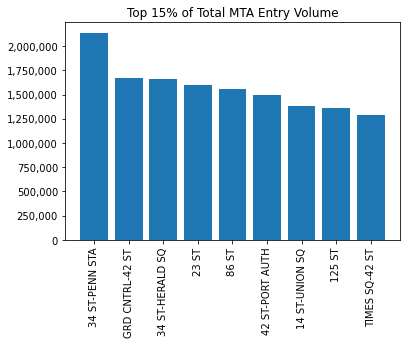

In [27]:
# Stations that represent 15% of total entry volume
plt.bar(x=station_totals['STATION'][:9], height=station_totals['DAILY_ENTRIES'][:9])
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.title('Top 15% of Total MTA Entry Volume')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation=90)
#plt.savefig('Top15percentVolume.png', dpi=300, bbox_inches="tight", transparent = True)  

### Plot Daily Time Series For Single Turnstile
Select one turnstile (combination of [C/A, UNIT, SCP, STATION])
Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days).
Using matplotlib, create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis
You can use the following as a starting point:

    plt.figure(figsize=(10,3))
    plt.plot(<days>,<entries>)

In [28]:
%matplotlib inline

In [29]:
# single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
# (turnstiles_daily["UNIT"] == "R080") & 
# (turnstiles_daily["SCP"] == "01-00-00") & 
# (turnstiles_daily["STATION"] == "57 ST-7 AV")]

# single_turnstile.head()

In [30]:
# plt.figure(figsize=(15,5))
# plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
# plt.ylabel('# of Entries')
# plt.xlabel('Date')
# plt.xticks(rotation=45)
# plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')


### Daily Time Series For a Station  

#### 57 Ave Station

In [31]:
station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV']
station_daily_57_av.head()

,STATION,DATE,DAILY_ENTRIES
4032,57 ST-7 AV,2022-01-30,4800.0
4033,57 ST-7 AV,2022-01-31,5344.0
4034,57 ST-7 AV,2022-02-01,9720.0
4035,57 ST-7 AV,2022-02-02,10539.0
4036,57 ST-7 AV,2022-02-03,11623.0


Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

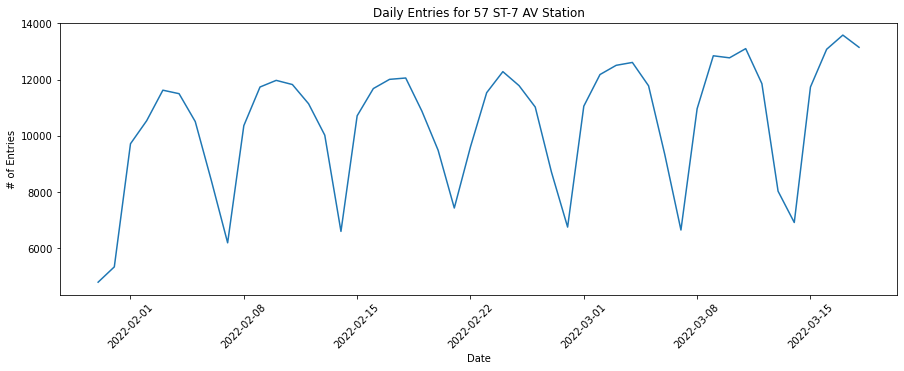

In [32]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')

#### 34 St Penn Station

In [33]:
station_daily_34Penn = station_daily[station_daily['STATION'] == '34 ST-PENN STA']
station_daily_34Penn.head()

,STATION,DATE,DAILY_ENTRIES
2928,34 ST-PENN STA,2022-01-30,13096.0
2929,34 ST-PENN STA,2022-01-31,19960.0
2930,34 ST-PENN STA,2022-02-01,44928.0
2931,34 ST-PENN STA,2022-02-02,47871.0
2932,34 ST-PENN STA,2022-02-03,49837.0


### Counts For One Week / One Station ??
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day of week may be useful)

plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [34]:
import numpy as np

#### 57 Ave Station

In [35]:
station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
station_daily_57_av.head()

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/3233257827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/3233257827.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/3233257827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
4032,57 ST-7 AV,2022-01-30,4800.0,6,4
4033,57 ST-7 AV,2022-01-31,5344.0,0,5
4034,57 ST-7 AV,2022-02-01,9720.0,1,5
4035,57 ST-7 AV,2022-02-02,10539.0,2,5
4036,57 ST-7 AV,2022-02-03,11623.0,3,5


Text(0.5, 1.0, 'Ridership per day for 57 ST-7 AV station')

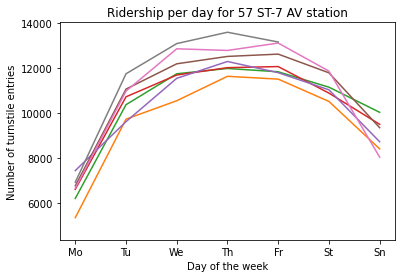

In [36]:
for i, group in station_daily_57_av.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 57 ST-7 AV station')

#### 34 St Penn Station

In [37]:
station_daily_34Penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34Penn['DATE']).dt.dayofweek
station_daily_34Penn['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34Penn['DATE']).dt.week
station_daily_34Penn.head()

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/1911361728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_34Penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34Penn['DATE']).dt.dayofweek
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/1911361728.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  station_daily_34Penn['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34Penn['DATE']).dt.week
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/1911361728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
2928,34 ST-PENN STA,2022-01-30,13096.0,6,4
2929,34 ST-PENN STA,2022-01-31,19960.0,0,5
2930,34 ST-PENN STA,2022-02-01,44928.0,1,5
2931,34 ST-PENN STA,2022-02-02,47871.0,2,5
2932,34 ST-PENN STA,2022-02-03,49837.0,3,5


#### Assigning Day Name

In [38]:
day_name = station_daily_34Penn['DATE'].dt.day_name()
day_name.head()

2928       Sunday
2929       Monday
2930      Tuesday
2931    Wednesday
2932     Thursday
Name: DATE, dtype: object

#### Get Entries By Day of Week By Specific Station

In [39]:
test_df = station_daily_34Penn.copy()
test_df['DAY_NAME'] = test_df['DATE'].dt.day_name()
test_df2 = test_df.groupby(["DAY_NAME", "STATION", "DAY_OF_WEEK_NUM"]).DAILY_ENTRIES.sum().reset_index()
test_df2.sort_values("DAY_OF_WEEK_NUM", ascending = True, inplace = True)

test_df2

,DAY_NAME,STATION,DAY_OF_WEEK_NUM,DAILY_ENTRIES
1,Monday,34 ST-PENN STA,0,158995.0
5,Tuesday,34 ST-PENN STA,1,331765.0
6,Wednesday,34 ST-PENN STA,2,385813.0
4,Thursday,34 ST-PENN STA,3,390296.0
0,Friday,34 ST-PENN STA,4,387920.0
2,Saturday,34 ST-PENN STA,5,299789.0
3,Sunday,34 ST-PENN STA,6,182193.0


#### Order Days Properly so they can be visualized properly

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/2218137479.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

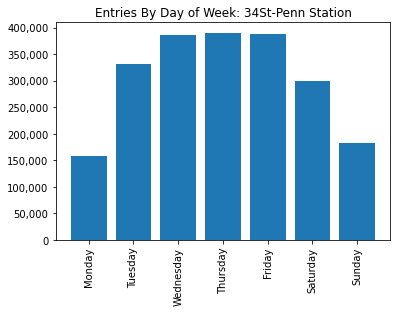

In [40]:
plt.bar(x=test_df2['DAY_NAME'], height=test_df2['DAILY_ENTRIES'])
#after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.title('Entries By Day of Week: 34St-Penn Station')
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.xticks(rotation=90)
#plt.savefig('EntriesDaysWeek.png', dpi=300, bbox_inches="tight", transparent = True)  

### To get an idea about the distribution of total ridership among different stations
Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)
to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do

indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90346/3165013894.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 50.0, '50,000'),
 Text(0, 100.0, '100,000'),
 Text(0, 150.0, '150,000'),
 Text(0, 200.0, '200,000'),
 Text(0, 250.0, '250,000'),
 Text(0, 300.0, '300,000')]

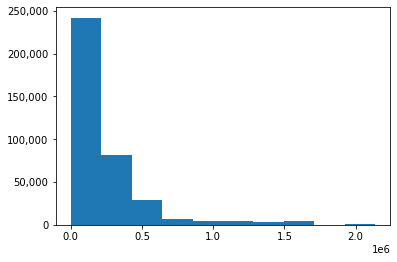

In [41]:
plt.hist(station_totals['DAILY_ENTRIES'])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

### View Top Ten Stations

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

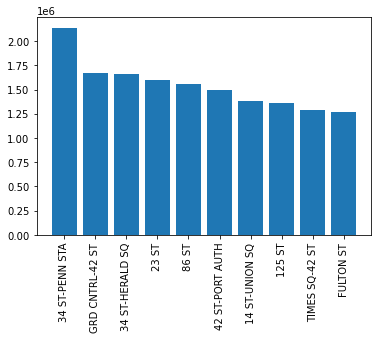

In [42]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)